In [1]:
# Linear SVM classification
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
# Import iris
iris = datasets.load_iris()
x = iris['data'][:, (2,3)]
y = (iris['target'] == 2).astype(np.float64)

In [4]:
# Feature scaling
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge', duel=False)),
])

In [5]:
# Fit
svm_clf.fit(x, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [6]:
# Make predicttion
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [10]:
# SVC wih SGD
from sklearn.linear_model import SGDClassifier

svm_clf_sgd = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_sgdc', SGDClassifier(loss='hinge', alpha=0.0001, )),
])

In [11]:
svm_clf_sgd.fit(x, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_sgdc',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [12]:
svm_clf_sgd.predict([[5.5, 1.7]])

array([1.])

In [14]:
# Nonlinear classification
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [15]:
x, y = make_moons(n_samples=100, noise=0.15)

In [17]:
# Pipeline
polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge'))
])

In [18]:
polynomial_svm_clf.fit(x, y)

D:\anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

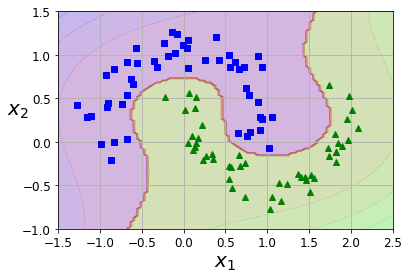

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    x = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(x).reshape(x0.shape)
    y_decision = clf.decision_function(x).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

def plot_dataset(x, y, axes):
    plt.plot(x[:,0][y==0], x[:,1][y==0], 'bs')
    plt.plot(x[:,0][y==1], x[:,1][y==1], 'g^')
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)


plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])

plt.show()

In [25]:
# SVM with kernel trick
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(x, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=1,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [26]:
# Gaussian Radial Basis Function Kernel
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('smv_clf', SVC(kernel='rbf', gamma=5, C=0.001)),
])

rbf_kernel_svm_clf.fit(x, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('smv_clf',
                 SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [28]:
# SVM regression
from sklearn.svm import LinearSVR

svm_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_reg', LinearSVR(epsilon=1.5)),
])

svm_reg.fit(x, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_reg',
                 LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
                           intercept_scaling=1.0, loss='epsilon_insensitive',
                           max_iter=1000, random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [29]:
# Nonlinear SVM regression
from sklearn.svm import SVR

svm_poly_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_reg', SVR(kernel='poly', degree=2, C=100, epsilon=0.1)),
])

svm_poly_reg.fit(x, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly_reg',
                 SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)